In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom
%matplotlib inline

Let us assume that a head can attach on site composed of 2 consecutive charges. In average, there is a charge every $A$ monomers. In other words, the probability for a monomer to be charged is $1/A$. Therfore the probability of having two consecutive charged monomer is $1/A^2$, or a site every $A^2$ monomers. The probability of the number of sites $s$ on a chain containing $N_0$ monomers follows a binomial distribution of maximum $N_0$ and probability $1/A^2$. The average number of sites is $N_0/A^2$.

We know that there is exactly one head per body, thus the probability of a chain containing $s$ sites to have $h$ heads attached follows a binomial distribution of mean 1, maximum $s$, probability $1/s$.

While $A^2$ is small enough compared to $N_0$, it is safe to think on the average values. There is a head attached every $s$ sites, that is to say every $N_0$ monomers.

In [2]:
N0=70

In [3]:
def P(h,A):
    Ps = binom.pmf(np.arange(1,N0+1), N0, 1/A**2)
    Ph = np.array([binom.pmf(h, s, 1/s) for s in range(1,N0+1)])
    return np.sum(Ps*Ph)

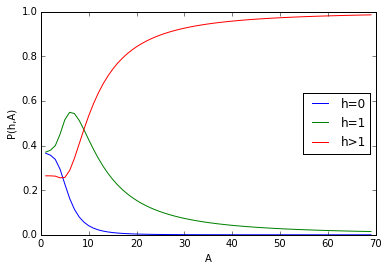

In [4]:
plt.plot(range(1,N0), [P(0, a) for a in range(1,N0)], label='h=0')
plt.plot(range(1,N0), [P(1, a) for a in range(1,N0)], label='h=1')
plt.plot(range(1,N0), [1-P(0,a)-P(1, a) for a in range(1,N0)], label='h>1')
plt.legend(loc='center right')
plt.xlabel('A')
plt.ylabel('P(h,A)')

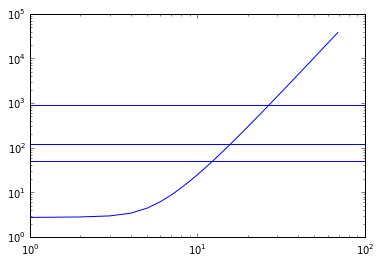

In [5]:
plt.plot(range(1,N0), [1/P(0,a) for a in range(1,N0)], label='h=1')
plt.xscale('log')
plt.yscale('log')
for n in [51, 123, 881]:
    plt.axhline(n)

In [6]:
1/P(0,1)

2.7379559042646848

In [7]:
np.e

2.718281828459045

In [8]:
def P1(h,A):
    Ps = binom.pmf(np.arange(1,N0+1), N0, 1/A)
    Ph = np.array([binom.pmf(h, s, 1/s) for s in range(1,N0+1)])
    return np.sum(Ps*Ph)

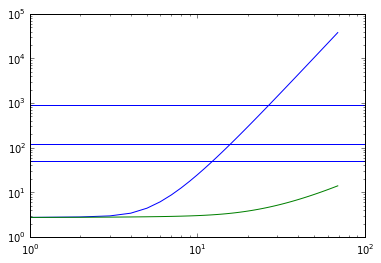

In [9]:
plt.plot(range(1,N0), [1/P(0,a) for a in range(1,N0)], label='h=1')
plt.plot(range(1,N0), [1/P1(0,a) for a in range(1,N0)], label='h=1')
plt.xscale('log')
plt.yscale('log')
for n in [51, 123, 881]:
    plt.axhline(n)

Approximate $s$ to a single value

In [41]:
def P2(h,A):
    #s = N0/A**2
    #if s>=2:
    #    return binom.pmf(h, s, 1/s)
    return binom.pmf(2, N0, 1/A**2) * binom.pmf(h, 2, 1/2)

/home/mathieu/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  app.launch_new_instance()


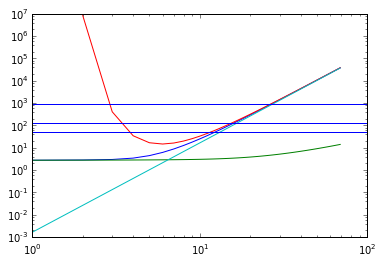

In [53]:
plt.plot(range(1,N0), [1/P(0,a) for a in range(1,N0)], label='h=1')
plt.plot(range(1,N0), [1/P1(0,a) for a in range(1,N0)], label='h=1')
plt.plot(range(1,N0), [1/P2(0,a) for a in range(1,N0)], label='h=1')
plt.plot(range(1,N0), (np.arange(1,N0))**4*8/N0**2, label='h=1')
plt.xscale('log')
plt.yscale('log')
for n in [51, 123, 881]:
    plt.axhline(n)

In [27]:
binom.pmf(N0, N0, 1/10**2)

1.00000000000003e-140

70
17
4
2
2
2


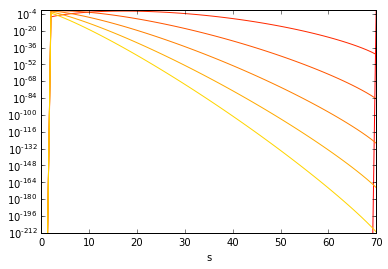

In [36]:
for a in 2**np.arange(6):
    plt.plot(
        np.arange(1,N0+1), 
        binom.pmf(np.arange(1,N0+1), N0, 1/a**2) * np.array([binom.pmf(0, s, 1/s) for s in range(1,N0+1)]),
        color=plt.cm.autumn(np.log2(a)/6)
    )
    print(1+np.argmax(binom.pmf(np.arange(1,N0+1), N0, 1/a**2) * np.array([binom.pmf(0, s, 1/s) for s in range(1,N0+1)])))
plt.xlabel('s')
plt.yscale('log')

In [49]:
binom.pmf(2, N0, 1/2)

2.0455845676190186e-18